# Bank Account Assessment Project Part 5
### Decision trees and random forests

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import graphviz
mpl.rcParams['figure.dpi'] = 400
df = pd.read_csv("Chapter_1_cleaned_data.csv")

In [5]:
features_response = df.columns.tolist()
items_to_remove = ["ID", "SEX", "PAY_2", "PAY_3", "PAY_4", "PAY_5", "PAY_6",
                  "EDUCATION_CAT", "graduate school", "high school", "none",
                  "others", "university"]

features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [8]:
from sklearn.model_selection import train_test_split
from sklearn import tree

x_train, x_test, y_train, y_test = train_test_split(df[features_response[:-1]].values,
                                                   df["default payment next month"].values,
                                                   test_size=0.2, random_state=24)

In [10]:
dt = tree.DecisionTreeClassifier(max_depth=2)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [11]:
# export trained model so it can be read by graphviz library
dot_data = tree.export_graphviz(dt, out_file=None, filled=True,
                               rounded=True, feature_names=features_response[:-1],
                               proportion=True, class_names=["Not defaulted", "Defaulted"])

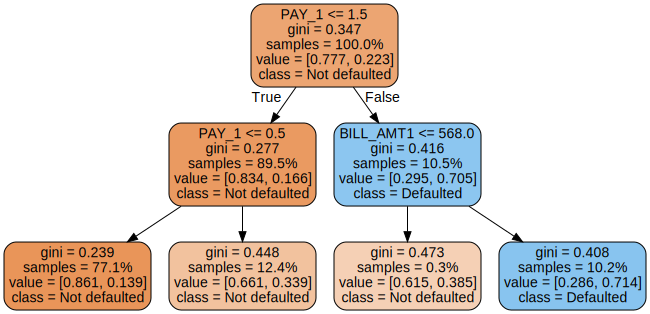

In [14]:
graph = graphviz.Source(dot_data)
graph

In [16]:
print(x_train.shape)
features_response[:-1].index("PAY_1")

(21331, 17)


4

In [18]:
# proportion of training samples in which PAY_1 >= 1.5
sum(x_train[:, 4] <= 1.5) / x_train.shape[0]

0.8946134733486475

In [19]:
np.mean(y_train)

0.223102526838873

In [23]:
pm0 = np.linspace(0.01, 0.99, 99)
pm1 = 1 - pm0
misclassification_rate = np.minimum(pm0, pm1)

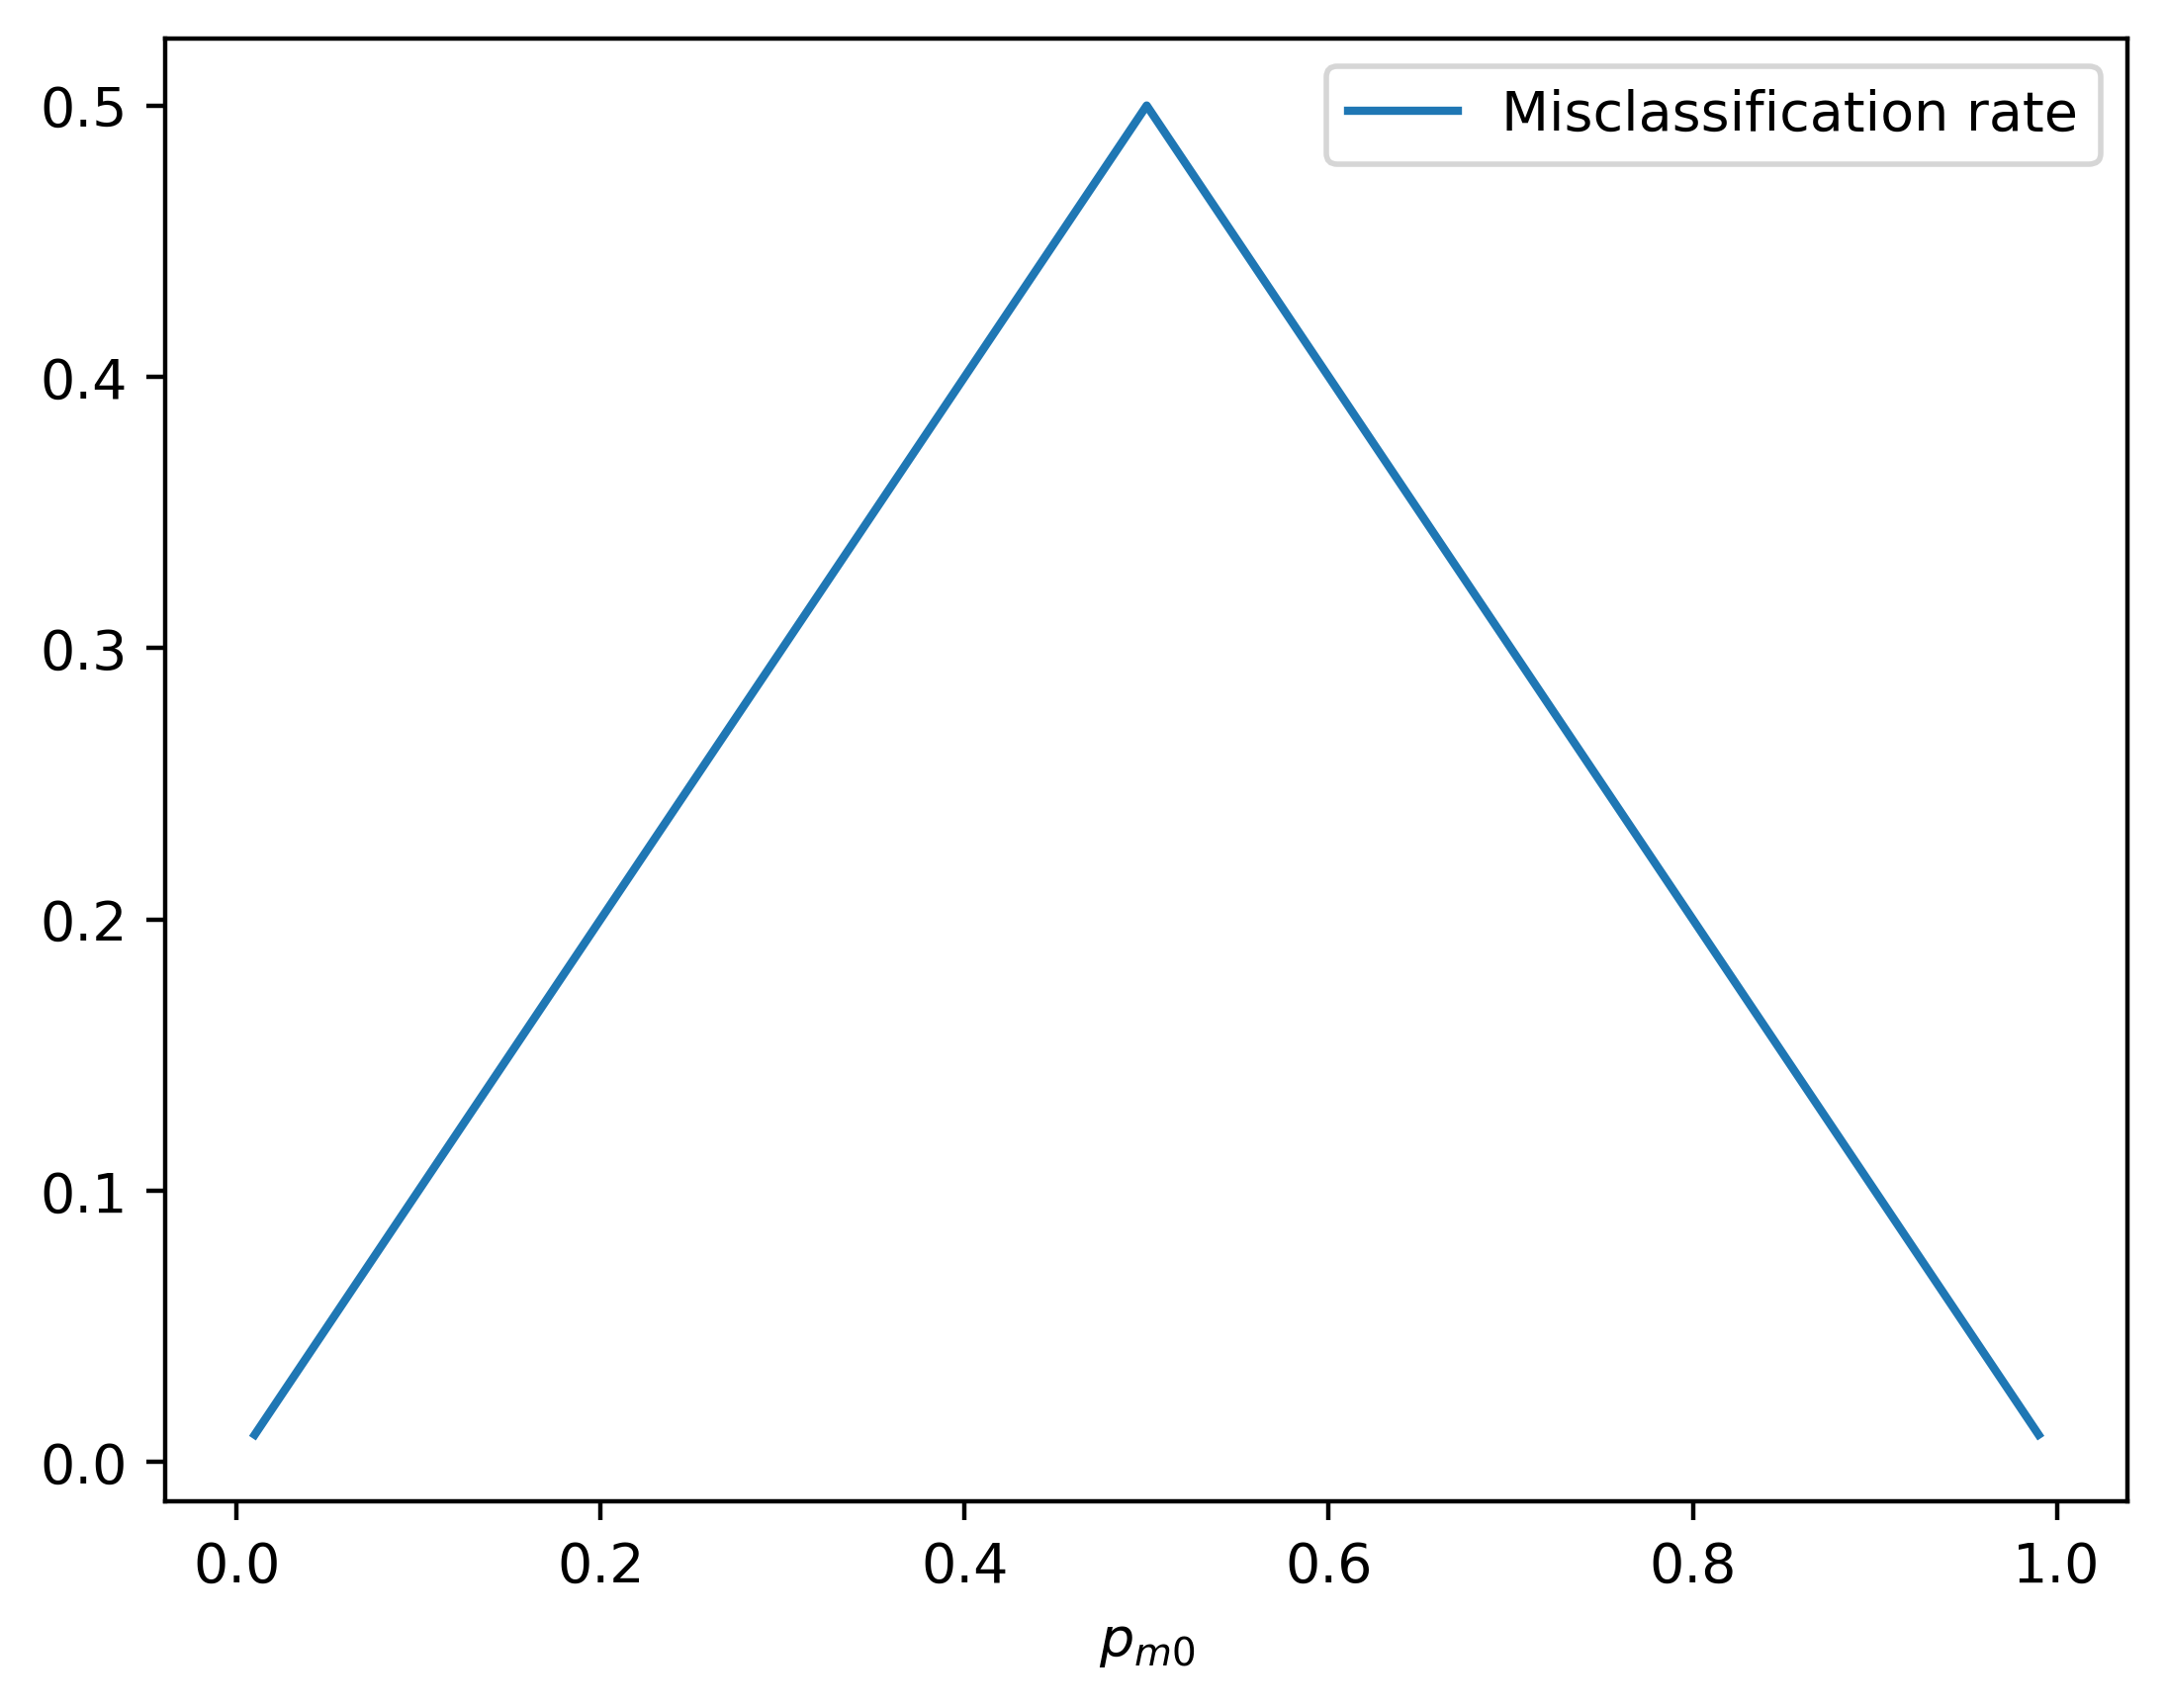

In [24]:
plt.plot(pm0, misclassification_rate, label="Misclassification rate")
plt.xlabel("$p_{m0}$")
plt.legend()

In [26]:
gini = (pm0*(1 - pm0)) + (pm1*(1 - pm1))
cross_ent = -1*((pm0*np.log(pm0)) + (pm1*np.log(pm1)))

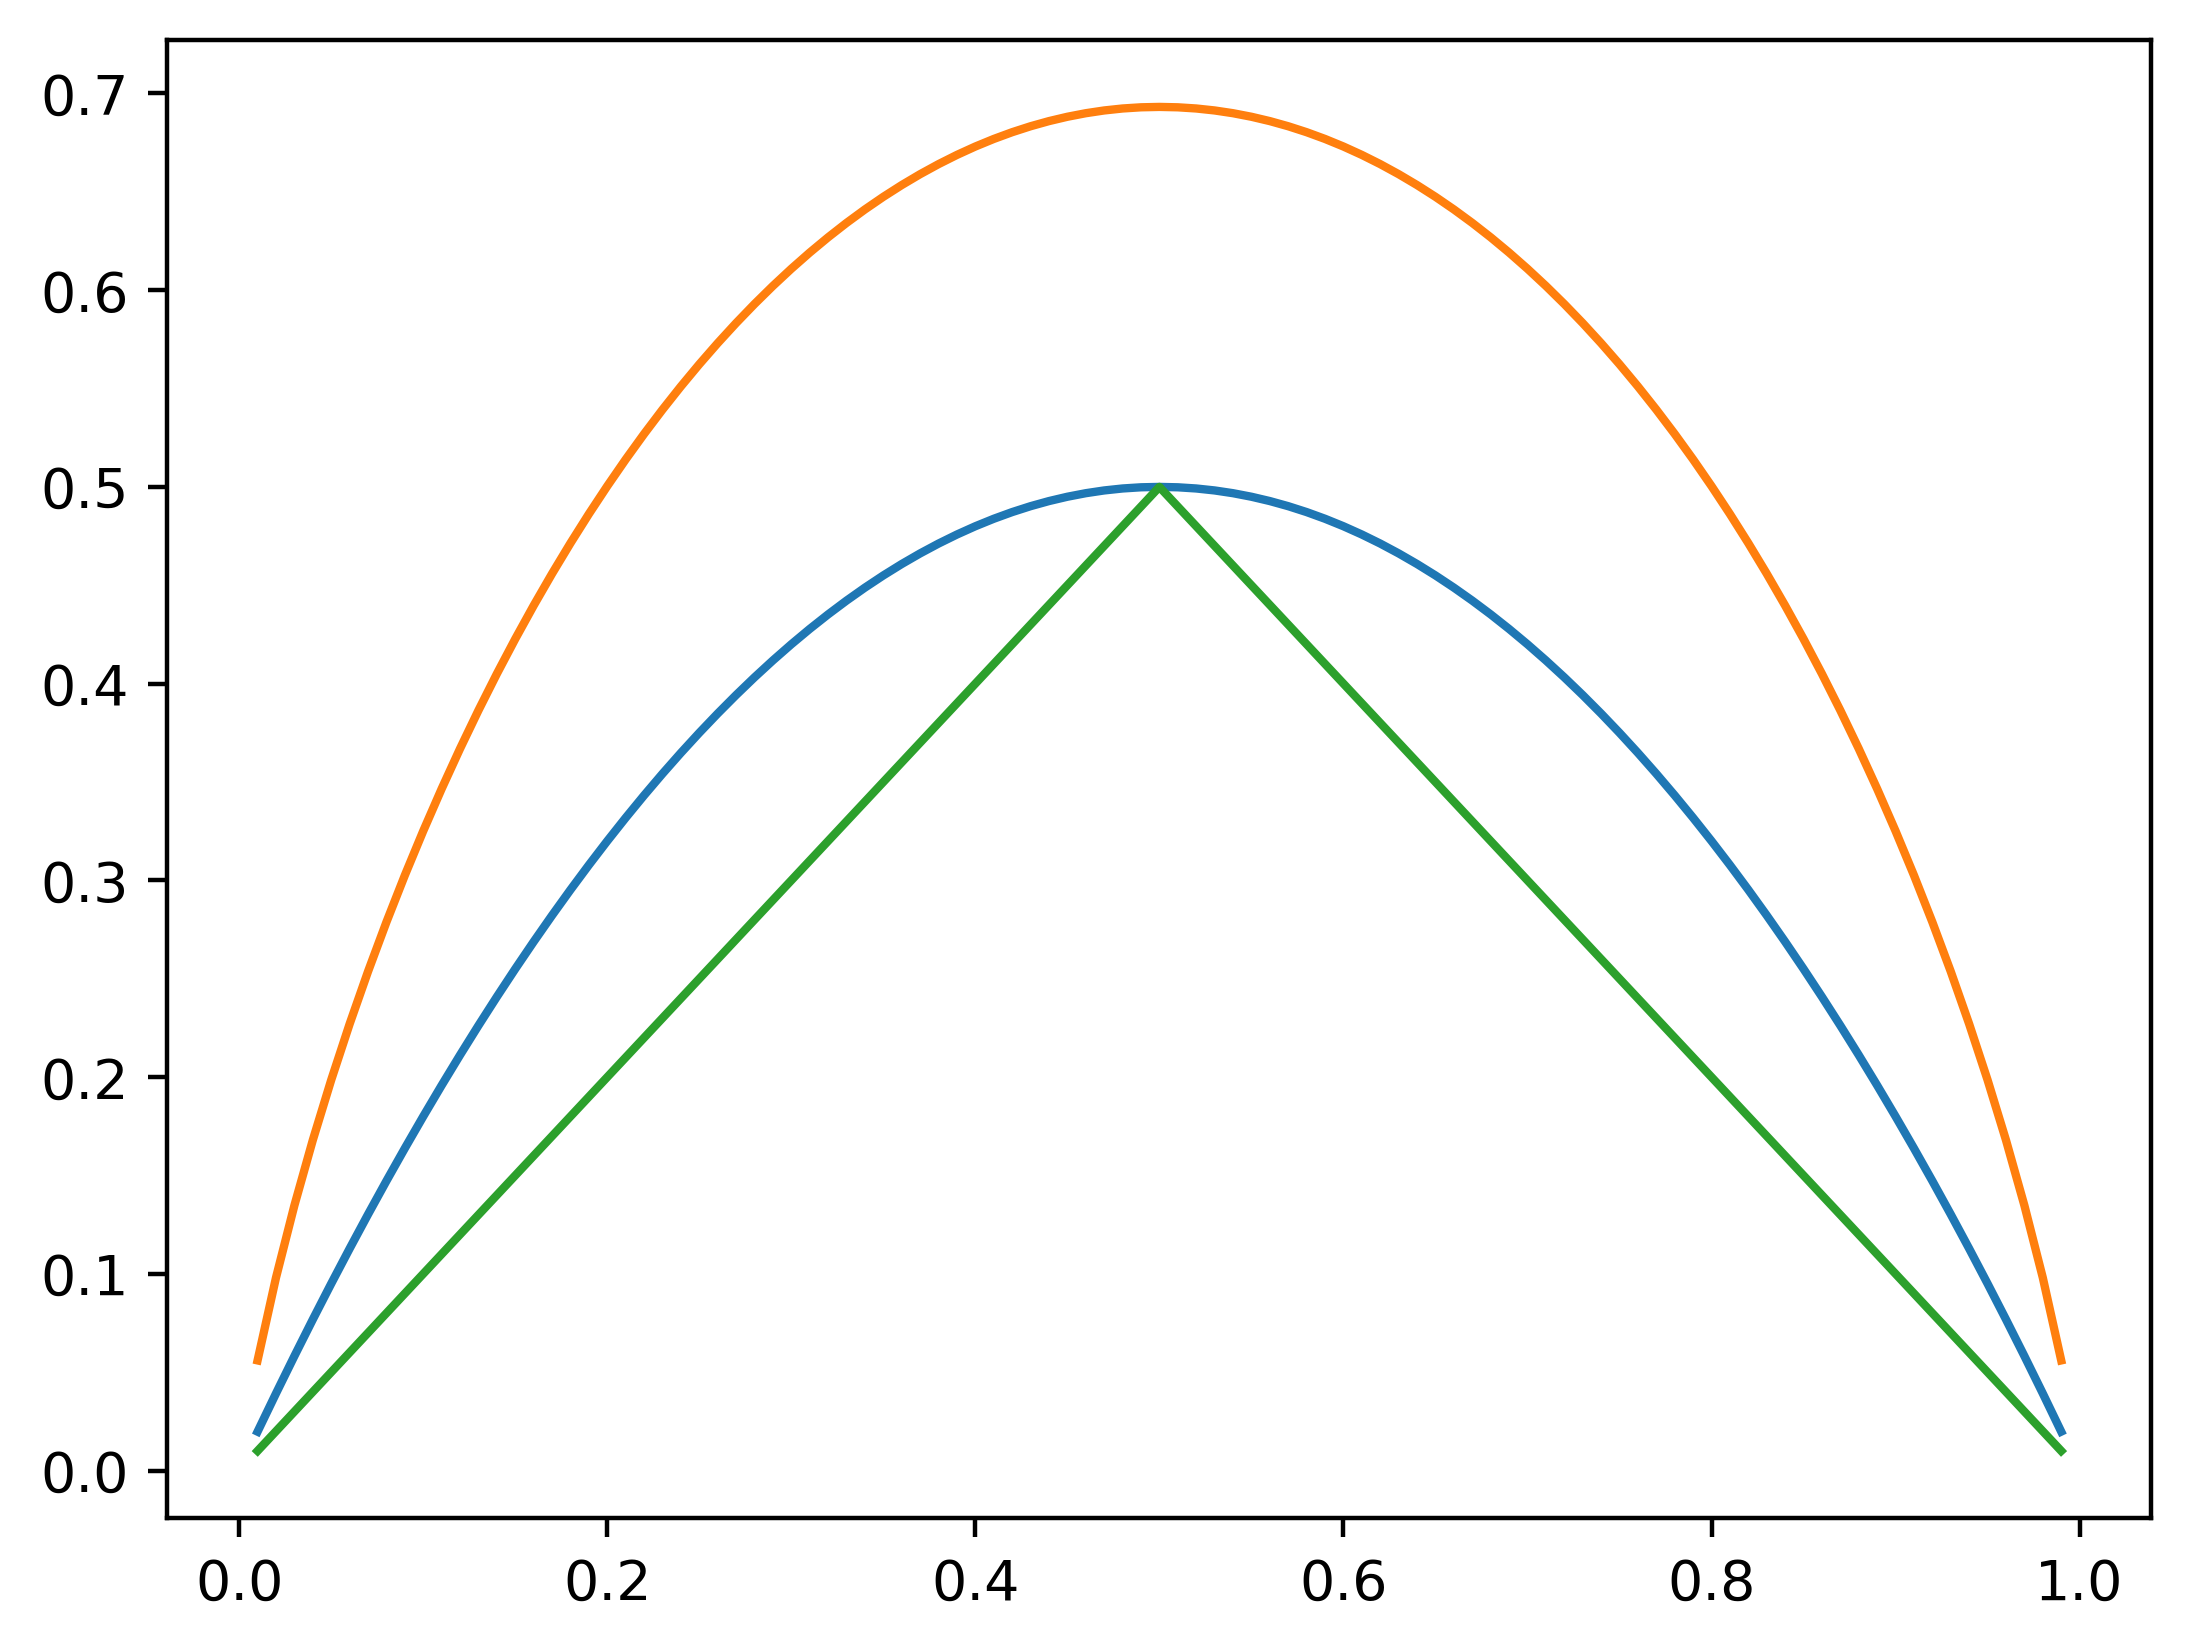

In [28]:
plt.plot(pm0, gini, label="Gini impurity")
plt.plot(pm0, cross_ent, label="Cross entropy")
plt.plot(pm0, misclassification_rate, label="Misclassification rate")

In [29]:
from sklearn.model_selection import GridSearchCV

print(x_train.shape)

(21331, 17)


In [35]:
params = {"max_depth": [1, 2, 4, 6, 8, 10, 12]}

cv = GridSearchCV(dt, param_grid=params, scoring="roc_auc", n_jobs=None,
                  refit=True, cv=4, verbose=1, 
                  error_score=np.nan, return_train_score=True)

In [36]:
cv.fit(x_train, y_train)

Fitting 4 folds for each of 7 candidates, totalling 28 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(max_depth=2),
             param_grid={'max_depth': [1, 2, 4, 6, 8, 10, 12]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [37]:
cv_results_df = pd.DataFrame(cv.cv_results_)
cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.085155,0.003341,0.008551,0.008880,1,{'max_depth': 1},0.639514,0.643398,0.651891,0.650753,0.646389,0.005136,7,0.648680,0.647384,0.644553,0.644934,0.646388,0.001712
1,0.156781,0.013872,0.006782,0.002758,2,{'max_depth': 2},0.695134,0.699022,0.713376,0.699510,0.701761,0.006917,5,0.704034,0.702700,0.698113,0.702535,0.701845,0.002232
2,0.284133,0.026690,0.004621,0.003308,4,{'max_depth': 4},0.732720,0.740116,0.746946,0.743731,0.740878,0.005294,2,0.756882,0.752256,0.749368,0.753055,0.752890,0.002682
3,0.340435,0.083877,0.002447,0.002639,6,{'max_depth': 6},0.744848,0.746479,0.750630,0.740774,0.745683,0.003532,1,0.782202,0.780125,0.775228,0.774750,0.778076,0.003178
4,0.418799,0.078310,0.002572,0.002771,8,{'max_depth': 8},0.727426,0.731726,0.750919,0.730140,0.735053,0.009289,3,0.811958,0.808245,0.803625,0.802048,0.806469,0.003903
5,0.625068,0.101019,0.004358,0.004872,10,{'max_depth': 10},0.707734,0.706622,0.718293,0.712406,0.711264,0.004602,4,0.849373,0.854071,0.840974,0.837013,0.845358,0.006725
6,0.758220,0.077386,0.009580,0.002504,12,{'max_depth': 12},0.675274,0.658971,0.674081,0.679882,0.672052,0.007857,6,0.888033,0.903356,0.885776,0.875435,0.888150,0.009982


In [38]:
cv_results_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

Text(0, 0.5, 'ROC AUC')

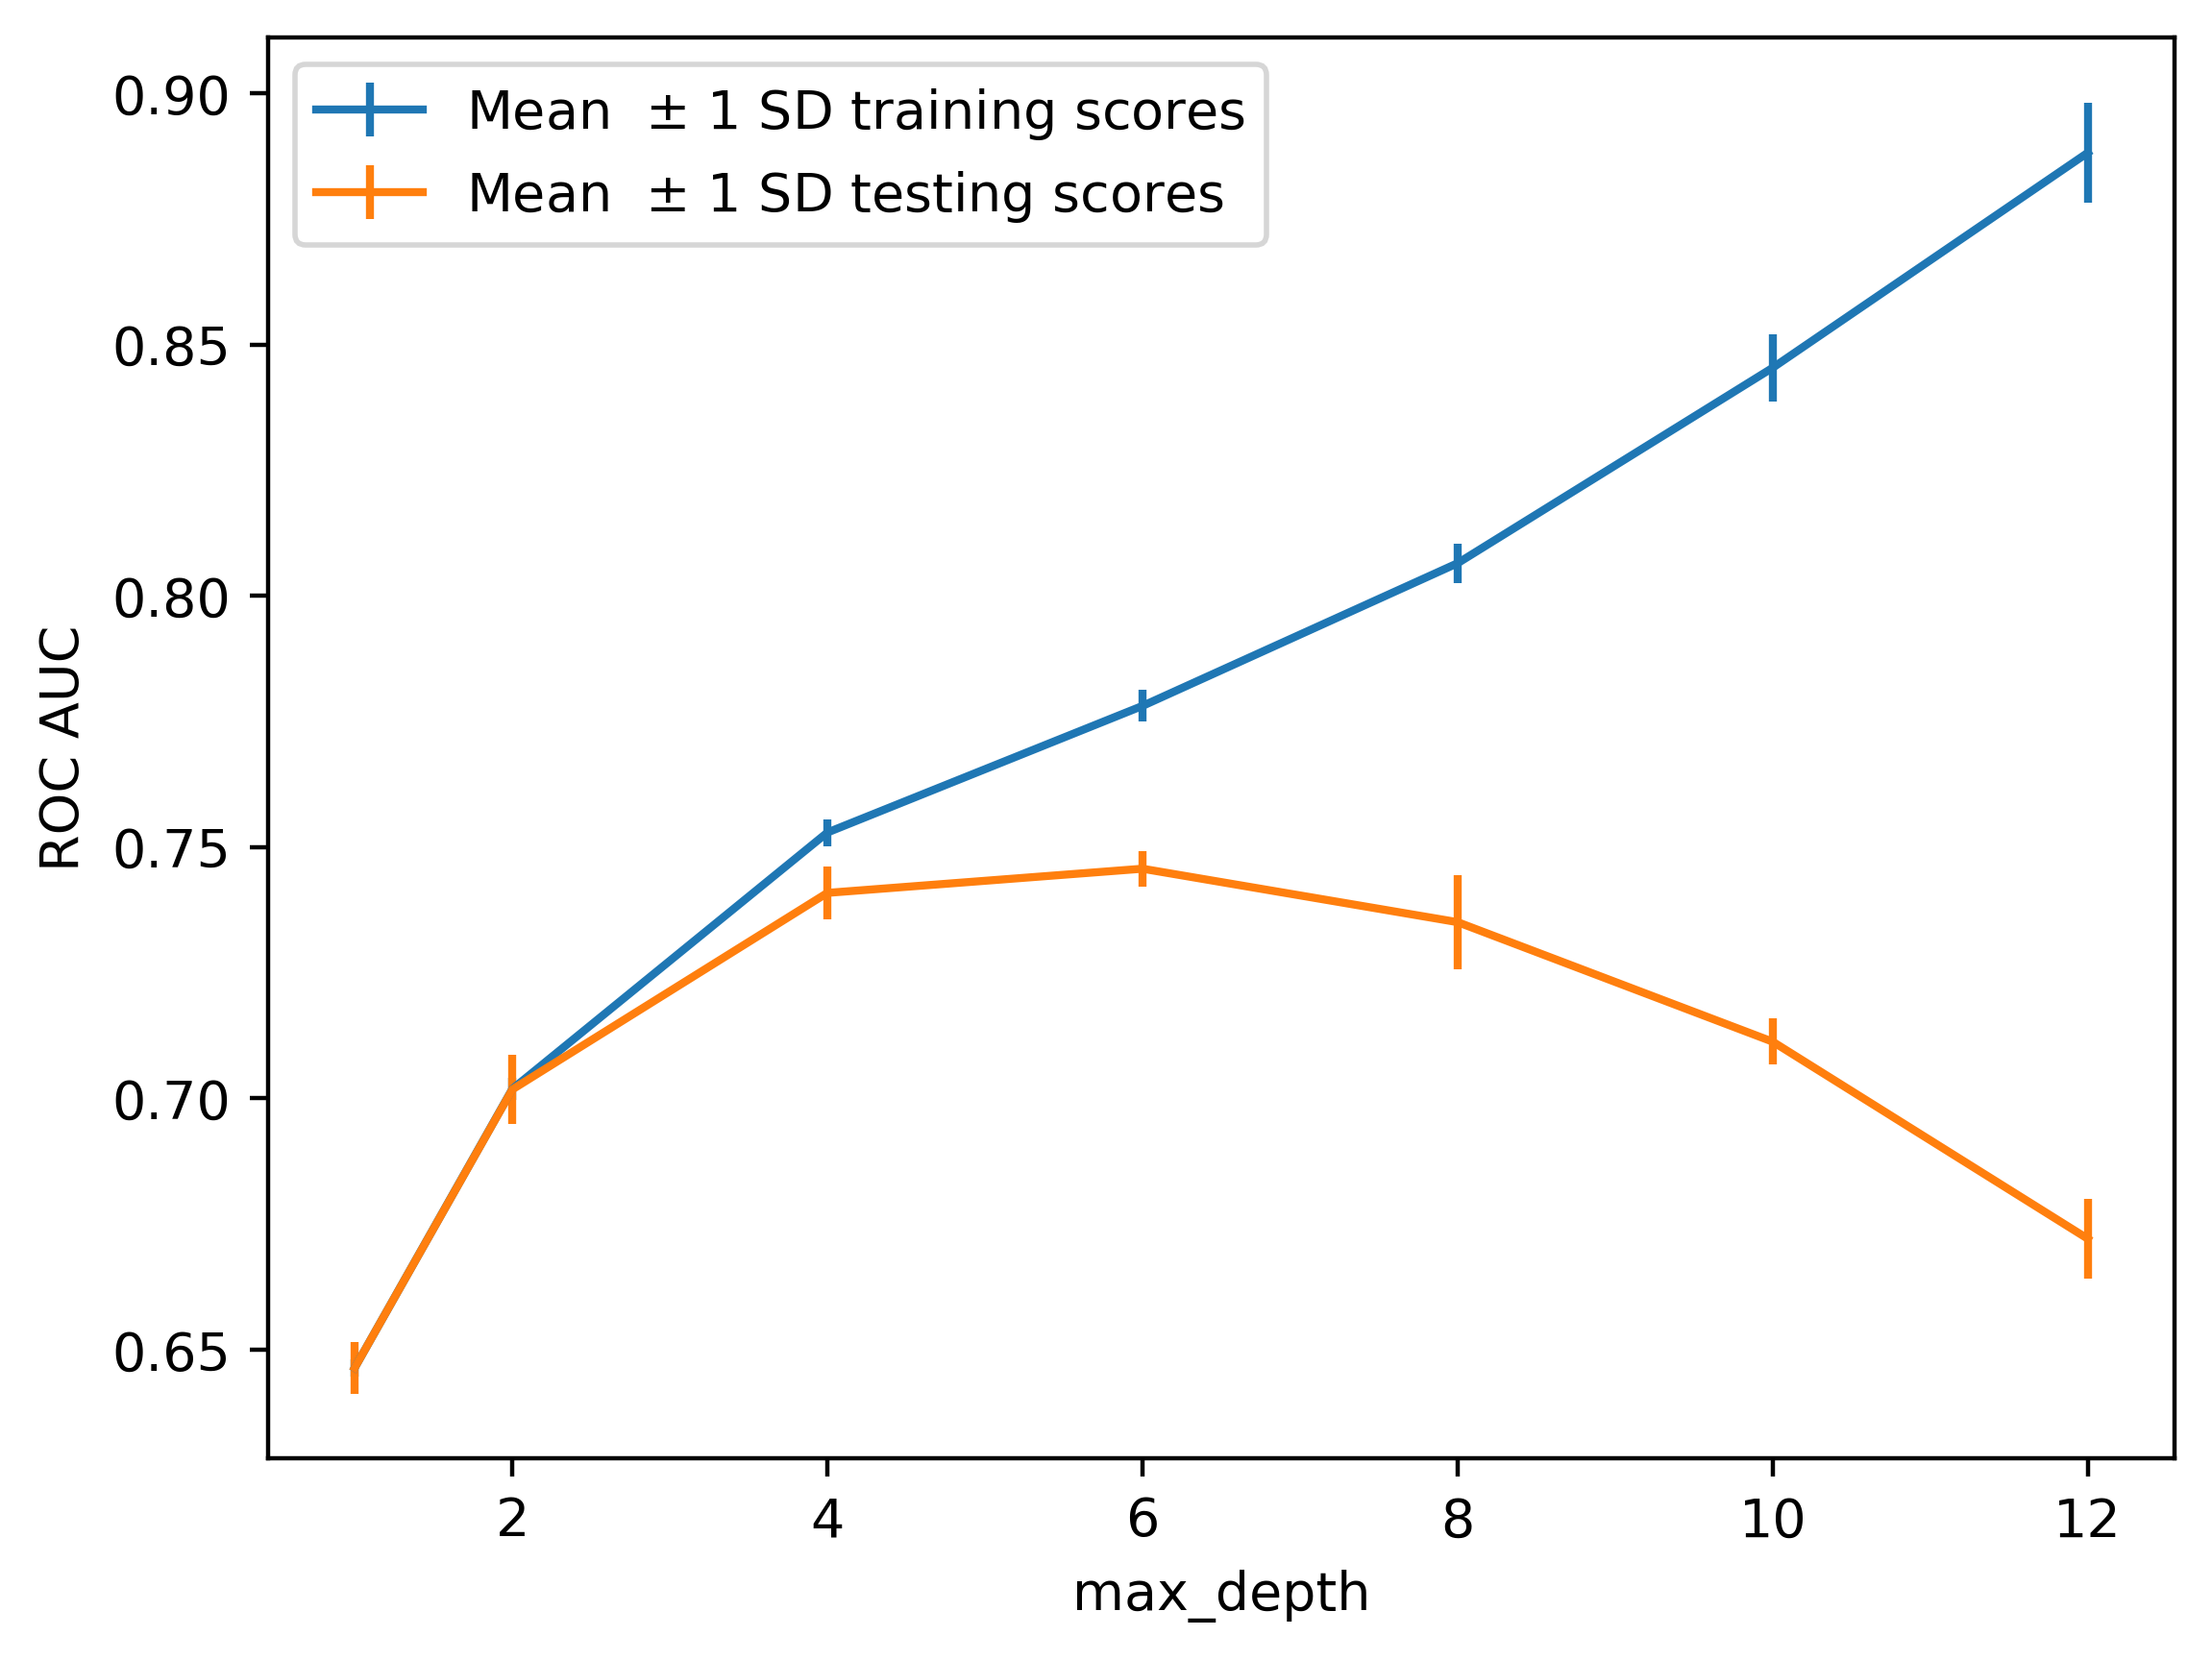

In [39]:
# plot error bar from training and test results for each value of max_depth
ax = plt.axes()
ax.errorbar(cv_results_df["param_max_depth"],
           cv_results_df["mean_train_score"],
           yerr=cv_results_df["std_train_score"],
           label="Mean  $\pm$ 1 SD training scores")
ax.errorbar(cv_results_df["param_max_depth"],
           cv_results_df["mean_test_score"],
           yerr=cv_results_df["std_test_score"],
           label="Mean  $\pm$ 1 SD testing scores")
ax.legend()
plt.xlabel("max_depth")
plt.ylabel("ROC AUC")